# Application of machine learning to the Fermi unassociated sources
                

<h5 style="text-align:right; margin-right:15px"> 2023-09-22 09:36</h5>

## Outline
**Goal: use predictive artificial intelligence to classify source types of the unid's**

Procedure:
* Choose the standard `scikit-learn` ML implementation 
* Choose "features"
* Evaluate classifier options, select one
* Validate, perhaps adjust feature set
* Apply to the UNID's 

The "features" that can be used for population analysis.

| Feature   | Description 
|-------    | ----------- 
|`Ep`       | $E_p$, Energy of SED maximum. limited to (100 MeV-1TeV)
|`Fp`       | $F_p$,  differential flux, in eV s-1 cm-2, at `Ep`
|`d`        | Spectral curvature, twice the log-parabola parameter $\beta$
|`var`      | `Variability_Index` parameter from 4FGL-DR4              

* Values and counts of the `association` column

Note that the number of pulsar+blazars (including bcu) is 93% of the total
associated.

## Examine correlations among selected features
        

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fea36808520>
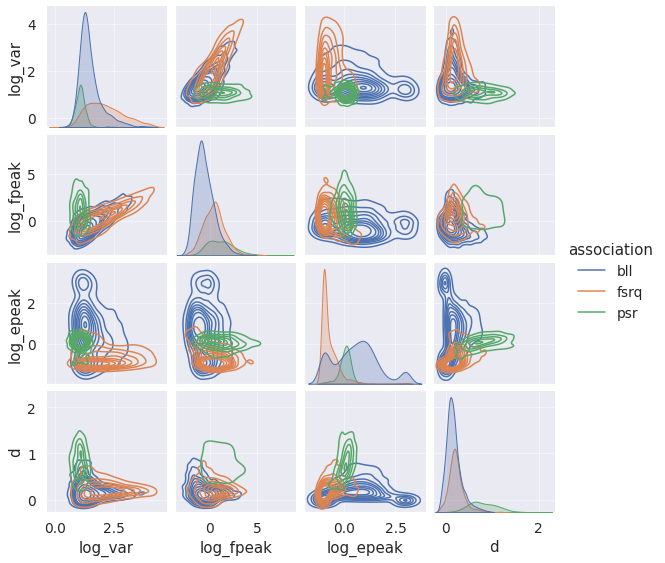

## Classifiers
This is an effort led by my student Timothy Tomter
The full list that was considered was

['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost', 'Naive Bayes', 'QDA']

Scores for the two best are shown here:
    

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fea36e83040>
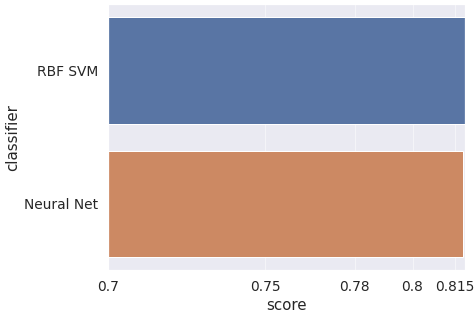

We chose the first, a Support Vector Classifier

### Confusion analysis, test size = 25.0 %
* Model: SVC(C=1, gamma=2)<br>
* Features: ['log_var', 'log_fpeak', 'log_epeak', 'd']<br>
Accuracy: 88%

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fea26ac58a0>
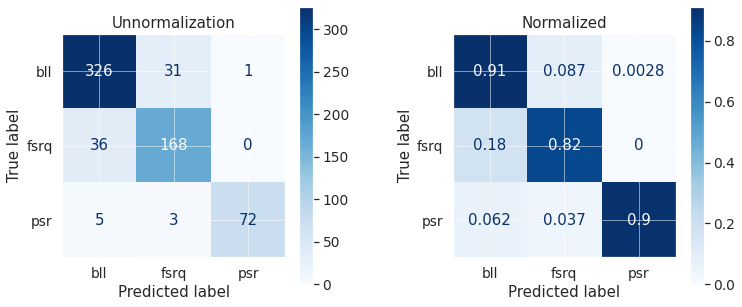

## Predictions
        

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fea2664f190>
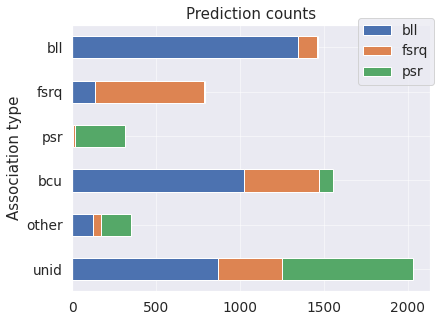

Notes:
* The target is the UNIDs, but applied to all
* BLL, FSRQ, Pulsar look OK (a little redundant), a check
* BCUs mostly blazars, a check
* Many predicted PSRs in "other" -- need to check

### Curvature vs $E_p$: compare training and unid sets

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fea26428be0>
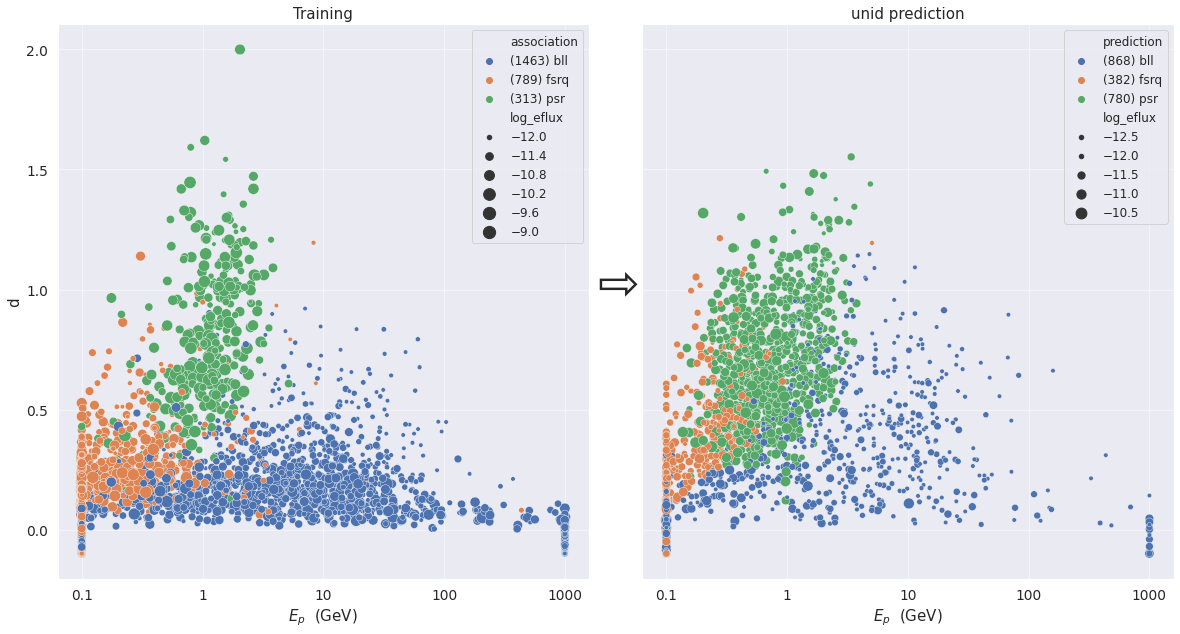

Note that the d distribution is shifted to higher values for the unid 
data.

### Curvature vs. $F_p$
Check the dependence of the curvarure $d$ on the peak flux.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fea259d3c70>
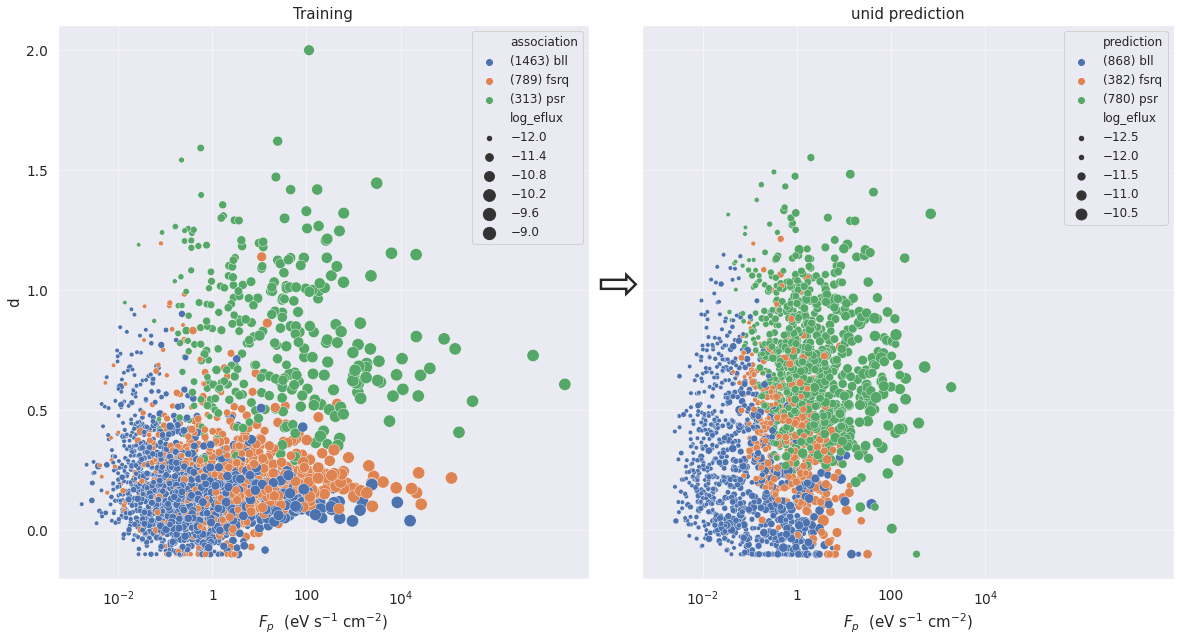

## Notes, todos:
* Reexamine feature set using random forest importance measures
* Perhaps expand the "other" category, e.g. SNRs
* Check some of the individual ones brought up here

In [1]:
%run pylib/machine_learning main